Iris Classification Model

Importing necessary libraries

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
%matplotlib inline

Load the Iris dataset into a Pandas DataFrame

In [37]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target

Checking for outliers

In [38]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     Species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


Checking for the data types

In [39]:
print(df.dtypes)

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Species                int64
dtype: object


Checking for the correlation

In [40]:
print(df.corr())


                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
Species                    0.956547  1.000000  


Calculate the skewness for all columns

In [7]:
print(df.skew())

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
Species              0.000000
dtype: float64


Checking for the unique values

In [41]:
print(df.nunique())

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
Species               3
dtype: int64


In [42]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')


Checking for the value counts

In [43]:
print(df["Species"].value_counts())

Species
0    50
1    50
2    50
Name: count, dtype: int64


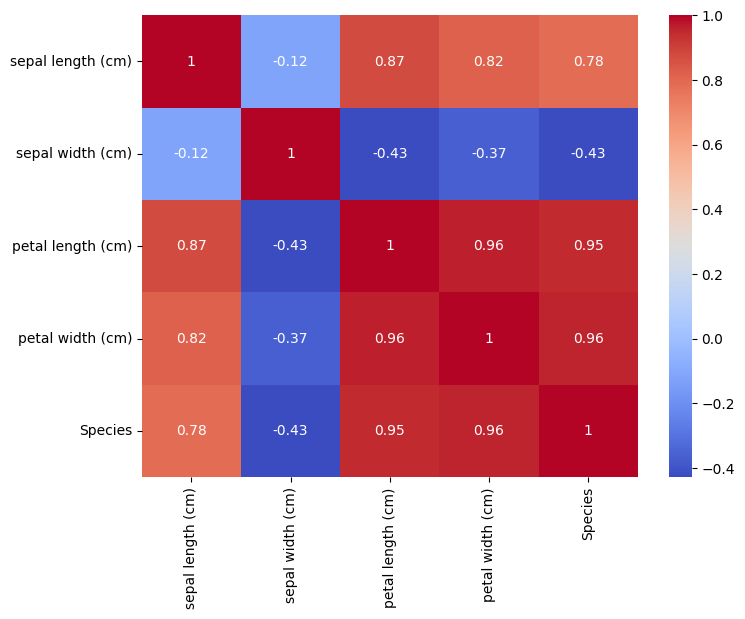

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

Split the data into training and testing sets

In [46]:
x = df.drop('Species', axis=1)
y = df['Species']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [48]:

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


Create and train the model

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Make predictions and evaluate the model

In [49]:
y_pred = model.predict(x_test)

In [50]:
print(y_pred)


[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.9736842105263158
Precision: 0.9763157894736842
Recall: 0.9736842105263158
F1 Score: 0.9739522830846216


Model Performance Metrics

In [52]:
import matplotlib.pyplot as plt

In [53]:
def plot_metrics(accuracy, precision, recall, f1):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [accuracy, precision, recall, f1])
    ax.set_ylabel("Score")
    ax.set_title("Model Performance Metrics")
    plt.show()

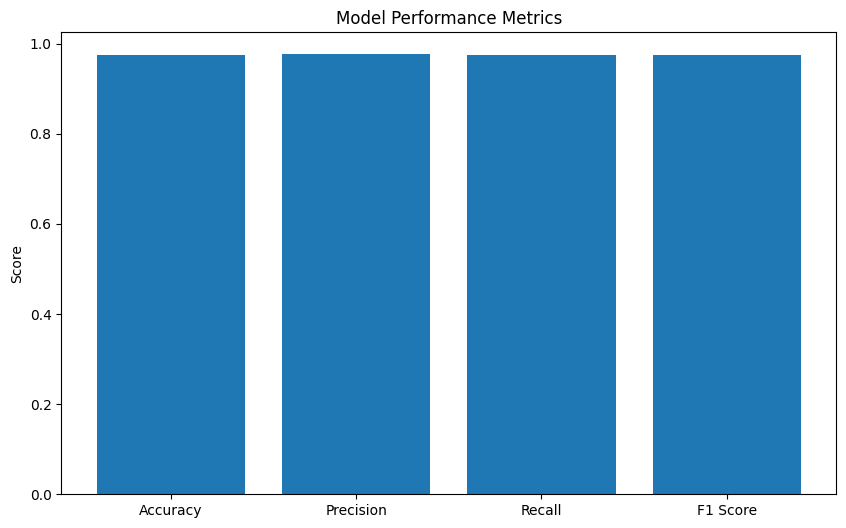

In [54]:
plot_metrics(accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='weighted'), recall_score(y_test, y_pred, average='weighted'), f1_score(y_test, y_pred, average='weighted'))